In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Cairo.xlsx")

print(df.info())
print("\nإحصائيات وصفية:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      84 non-null     datetime64[ns]
 1   Turbidity                 84 non-null     float64       
 2   Temprature                84 non-null     float64       
 3   Delta T                   84 non-null     float64       
 4   PH                        84 non-null     float64       
 5   Total Dissolved Solids    84 non-null     float64       
 6   Phosphates (PO4)          84 non-null     float64       
 7   Nitrates as (NO3)         84 non-null     float64       
 8   Dissolved Oxygen          84 non-null     float64       
 9   Biological Oxygen Demand  84 non-null     float64       
 10  Fecal Coliform            84 non-null     float64       
 11  Water Quality             84 non-null     float64       
dtypes: datetime64[ns](1), fl

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def test_stationarity(timeseries):
    # Dickey-Fuller Test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic',
        'p-value',
        'Number of Lags Used',
        'Number of Observations Used'
    ])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

# Check stationarity for each variable
for column in df_numeric.columns:
    print(f"\nChecking stationarity for {column}")
    test_stationarity(df_numeric[column])


Checking stationarity for Turbidity
Results of Dickey-Fuller Test:
Test Statistic                -8.546254e+00
p-value                        9.485622e-14
Number of Lags Used            3.000000e+00
Number of Observations Used    3.320000e+02
Critical Value (1%)           -3.450201e+00
Critical Value (5%)           -2.870285e+00
Critical Value (10%)          -2.571429e+00
dtype: float64

Checking stationarity for Temprature
Results of Dickey-Fuller Test:
Test Statistic                  -3.991209
p-value                          0.001457
Number of Lags Used              4.000000
Number of Observations Used    331.000000
Critical Value (1%)             -3.450262
Critical Value (5%)             -2.870312
Critical Value (10%)            -2.571443
dtype: float64

Checking stationarity for Delta T
Results of Dickey-Fuller Test:
Test Statistic                  -4.027565
p-value                          0.001273
Number of Lags Used              4.000000
Number of Observations Used    331.0000

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

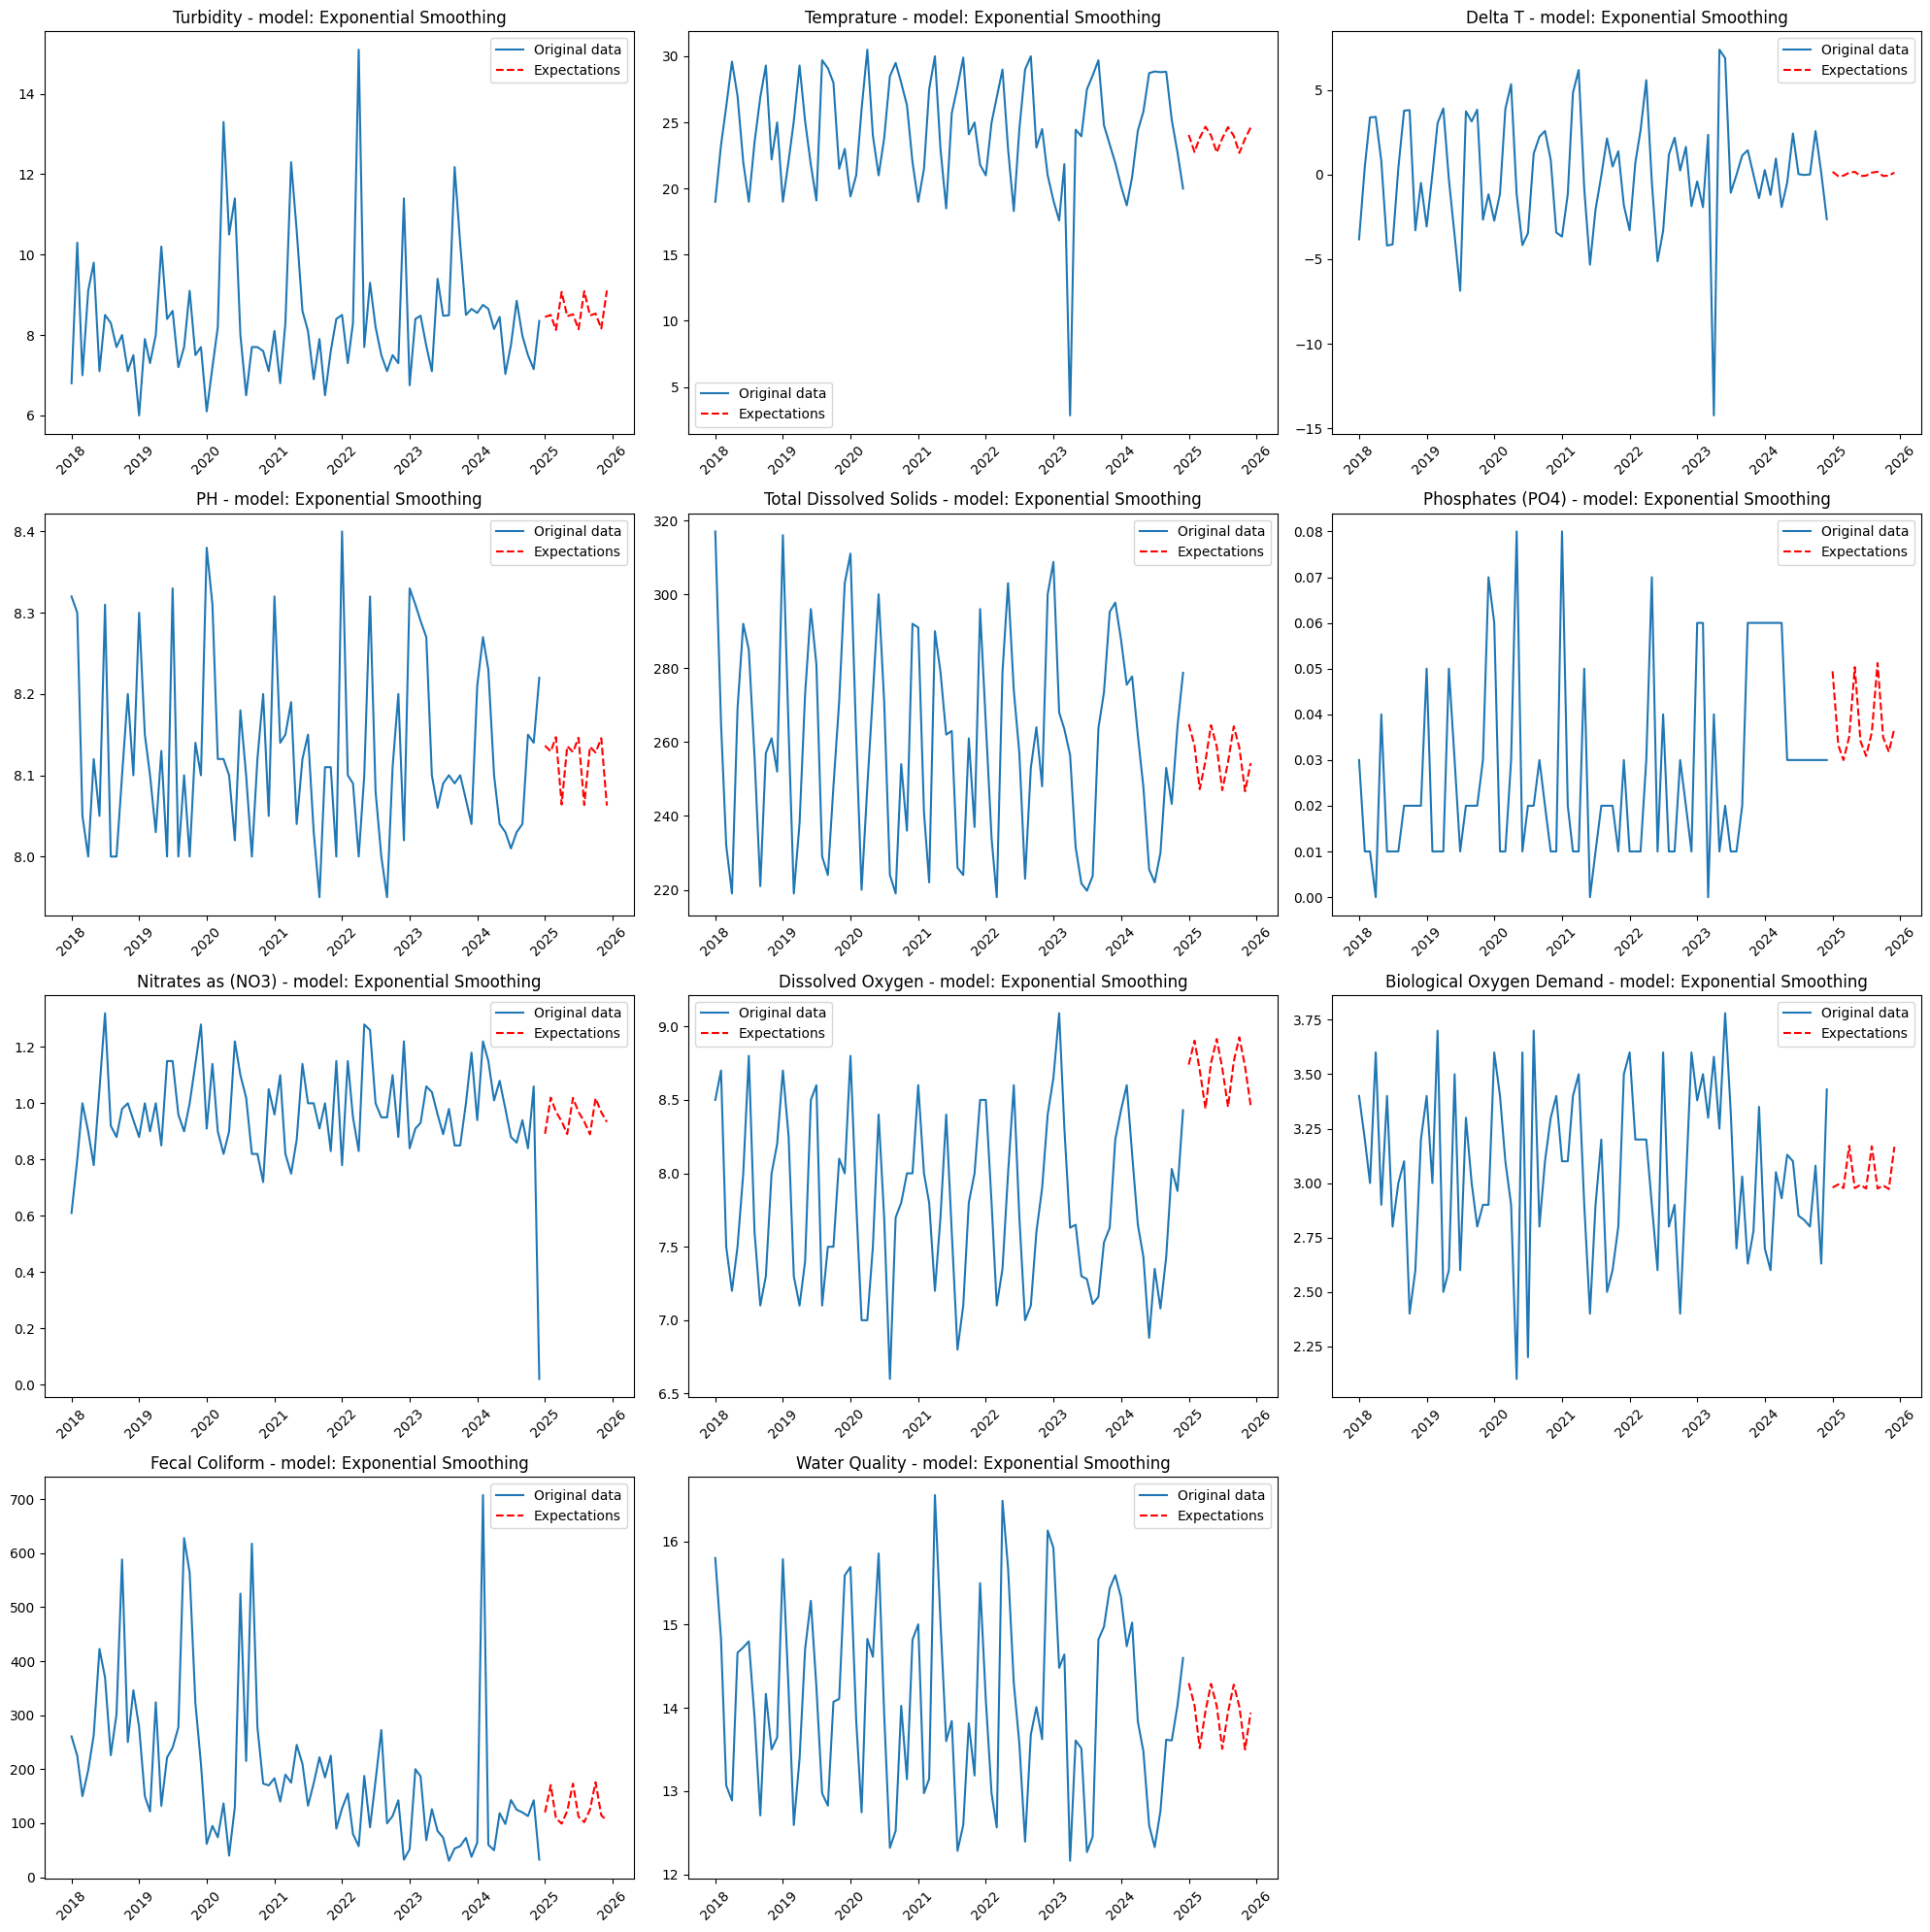

تقرير التنبؤ المتقدم

المتغير: Turbidity
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: 8.3500
أول قيمة متوقعة: 8.4494
التغير المتوقع: 0.0994

المتغير: Temprature
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: 20.0000
أول قيمة متوقعة: 24.0534
التغير المتوقع: 4.0534

المتغير: Delta T
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: -2.6400
أول قيمة متوقعة: 0.1549
التغير المتوقع: 2.7949

المتغير: PH
--------------------
نوع النموذج: Exponential Smoothing
معلمات النموذج:
  trend: additive
  seasonal: additive
  seasonal_periods: 4

القيمة الأخيرة: 8.2200
أول قيمة متوقعة: 8.1365
التغير المتوقع: -0.0835

المتغير: Total Dissolved Solids
--------------------
نوع النموذج: Exponential Smoothin

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def advanced_forecast_multivariate(df, forecast_steps=12):

    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    forecast_results = pd.DataFrame(
        index=pd.date_range(
            start=df.index[-1] + pd.offsets.MonthBegin(1),
            periods=forecast_steps,
            freq='MS'
        )
    )

    forecast_details = {}

    for column in df.columns:
        try:
            model = ExponentialSmoothing(
                df[column],
                trend='add',
                seasonal='add',
                seasonal_periods=3
            )

            fit_model = model.fit()
            forecasts = fit_model.forecast(steps=forecast_steps)

            forecast_results[column] = forecasts

            forecast_details[column] = {
                'model_type': 'Exponential Smoothing',
                'parameters': {
                    'trend': 'additive',
                    'seasonal': 'additive',
                    'seasonal_periods':3
                }
            }

        except Exception as e:
            print(f"خطأ في التنبؤ لـ {column}: {e}")

            try:
                ma = df[column].rolling(window=3).mean()

                last_ma = ma.iloc[-1]

                trend = (ma.iloc[-1] - ma.iloc[0]) / len(ma)

                forecasts = [last_ma]
                for _ in range(forecast_steps - 1):
                    next_value = forecasts[-1] + trend
                    forecasts.append(next_value)

                forecast_results[column] = forecasts

                forecast_details[column] = {
                    'model_type': 'Moving Average',
                    'parameters': {
                        'window': 3,
                        'trend_calculation': 'linear'
                    }
                }

            except Exception as e:
                print(f"خطأ في التنبؤ البديل لـ {column}: {e}")

    return forecast_results, forecast_details

def visualization_and_analysis(original_df, forecast_df, forecast_details):

    n_columns = len(forecast_df.columns)

    n_rows = (n_columns + 2) // 3

    plt.figure(figsize=(20, 5 * n_rows))

    for i, column in enumerate(forecast_df.columns, 1):
        plt.subplot(n_rows, 3, i)

        # البيانات الأصلية
        plt.plot(original_df.index, original_df[column], label='Original data')

        # التوقعات
        plt.plot(forecast_df.index, forecast_df[column], label='Expectations', linestyle='--', color='red')

        plt.title(f'{column} - model: {forecast_details[column]["model_type"]}')
        plt.legend()
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # تقرير تفصيلي
    report = "تقرير التنبؤ المتقدم\n"
    report += "=" * 30 + "\n\n"

    for column in forecast_df.columns:
        report += f"المتغير: {column}\n"
        report += "-" * 20 + "\n"

        # تفاصيل النموذج
        model_type = forecast_details[column]['model_type']
        report += f"نوع النموذج: {model_type}\n"

        # معلمات النموذج
        report += "معلمات النموذج:\n"
        for param, value in forecast_details[column]['parameters'].items():
            report += f"  {param}: {value}\n"

        # القيم الأخيرة والمتوقعة
        last_original = original_df[column].iloc[-1]
        first_forecast = forecast_df[column].iloc[0]

        report += f"\nالقيمة الأخيرة: {last_original:.4f}\n"
        report += f"أول قيمة متوقعة: {first_forecast:.4f}\n"
        report += f"التغير المتوقع: {first_forecast - last_original:.4f}\n\n"

    return report

# تحميل البيانات
df = pd.read_excel("Cairo.xlsx")

# التأكد من صحة التاريخ
if 'Date' not in df.columns:
    df['Date'] = pd.date_range(start='2018-01-01', periods=len(df))

# ضبط التاريخ كفهرس
df.set_index('Date', inplace=True)

# تحويل البيانات لرقمية
df_numeric = df.apply(pd.to_numeric, errors='coerce').dropna()

forecast_results, forecast_details = advanced_forecast_multivariate(df_numeric)

report = visualization_and_analysis(df_numeric, forecast_results, forecast_details)

print(report)

forecast_results.to_excel('comprehensive_forecast.xlsx')
def create_forecast_summary(forecast_results):

    summary = "ملخص التوقعات\n"
    summary += "=" * 20 + "\n\n"

    for column in forecast_results.columns:
        summary += f"{column}:\n"
        summary += "  التوقعات: " + ", ".join([f"{val:.4f}" for val in forecast_results[column]]) + "\n"
        summary += f"  المتوسط: {forecast_results[column].mean():.4f}\n"
        summary += f"  الحد الأدنى: {forecast_results[column].min():.4f}\n"
        summary += f"  الحد الأقصى: {forecast_results[column].max():.4f}\n\n"

    return summary

print(create_forecast_summary(forecast_results))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_forecast(original_df, forecast_df):
    """
    مقاييس دقة التنبؤ  MAE, RMSE, و MAPE
    """
    evaluation_report = " مقاييس دقة التنبؤ \n"
    evaluation_report += "=" * 30 + "\n\n"

    for column in forecast_df.columns:
        try:

            actual = original_df[column][-len(forecast_df):]
            predicted = forecast_df[column]


            mae = mean_absolute_error(actual, predicted)
            mse = mean_squared_error(actual, predicted)
            rmse = np.sqrt(mse)
            mape = np.mean(np.abs((actual - predicted) / actual)) * 100

            evaluation_report += f"المتغير: {column}\n"
            evaluation_report += f"MAE: {mae:.4f}\n"
            evaluation_report += f"RMSE: {rmse:.4f}\n"
            evaluation_report += f"MAPE: {mape:.2f}%\n"
            evaluation_report += "-" * 30 + "\n"

        except Exception as e:
            evaluation_report += f"خطأ في تقييم {column}: {e}\n"

    return evaluation_report

print(evaluate_forecast(df_numeric, forecast_results))


تقييم جودة التنبؤ

المتغير: Turbidity
MAE: 1.2083
RMSE: 1.3835
MAPE: nan%
------------------------------
المتغير: Temprature
MAE: 1.0744
RMSE: 1.1485
MAPE: nan%
------------------------------
المتغير: Delta T
MAE: 0.2893
RMSE: 0.3286
MAPE: nan%
------------------------------
المتغير: PH
MAE: 0.3308
RMSE: 0.4315
MAPE: nan%
------------------------------
المتغير: Total Dissolved Solids
MAE: 5.1071
RMSE: 6.1869
MAPE: nan%
------------------------------
المتغير: Phosphates (PO4)
MAE: 0.0128
RMSE: 0.0163
MAPE: nan%
------------------------------
المتغير: Nitrates as (NO3)
MAE: 0.4240
RMSE: 0.6202
MAPE: nan%
------------------------------
المتغير: Dissolved Oxygen
MAE: 0.7694
RMSE: 0.8972
MAPE: nan%
------------------------------
المتغير: Biological Oxygen Demand
MAE: 0.7022
RMSE: 0.8623
MAPE: nan%
------------------------------
المتغير: Fecal Coliform
MAE: 7.4810
RMSE: 11.0726
MAPE: nan%
------------------------------
المتغير: Water Quality
MAE: 0.4547
RMSE: 0.5775
MAPE: nan%
--------------